# A Regra Empírica e a Distribuição Normal


Este notebook tem como propósito ilustrar a Regra Empírica da Distribuição Normal, um dos pilares da estatística descritiva e inferencial. A ideia é mostrar, de forma visual e aplicada, como os dados que seguem uma distribuição aproximadamente normal se comportam em torno da média e como isso permite realizar previsões e interpretações práticas sobre a variabilidade dos fenômenos observados.


A Distribuição Normal, também chamada de Curva de Gauss, é um modelo teórico que descreve a forma como muitos fenômenos naturais, sociais e biológicos tendem a se distribuir: valores próximos da média são mais frequentes, enquanto valores muito altos ou muito baixos são raros. A Regra Empírica (ou Regra 68–95–99,7) resume esse comportamento afirmando que:


Aproximadamente 68% das observações estão dentro de 1 desvio-padrão da média;


Cerca de 95% estão dentro de 2 desvios-padrão;


E quase 99,7% estão dentro de 3 desvios-padrão.


O notebook demonstra essa propriedade por meio da simulação de dados e da visualização gráfica da curva normal, permitindo que o estudante veja na prática como esses intervalos capturam progressivamente mais dados à medida que aumentam. Com o apoio de bibliotecas como numpy, matplotlib e scipy.stats, o código constrói exemplos concretos que reforçam o entendimento intuitivo e matemático desse conceito.


Além disso, o material ajuda a desenvolver uma noção crítica sobre normalidade: nem todos os conjuntos de dados reais seguem exatamente uma distribuição normal, mas muitos se aproximam o suficiente para que a Regra Empírica sirva como uma boa aproximação inicial. Essa compreensão é essencial para interpretar resultados de testes estatísticos, intervalos de confiança e outras ferramentas inferenciais que assumem normalidade dos dados.


Em resumo, este notebook serve como uma ponte entre teoria e prática, mostrando como a forma da curva normal traduz-se em proporções previsíveis de dados em torno da média, e como isso fundamenta boa parte das decisões analíticas na estatística. O aluno é convidado a visualizar, manipular e confirmar empiricamente aquilo que os livros expressam em fórmulas, consolidando assim uma compreensão sólida e intuitiva da distribuição normal e de sua regra empírica.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
np.random.seed(1738) #"semente" de aleatoriedade

## Gerando dados simulados de uma população normal
A média é 7 horas e o desvio padrão é 1.7 horas.

In [ ]:
mu = 7  # Média
sigma = 1.7  # Desvio padrão

# Gerando os dados aleatórios com distribuição normal
Observations = np.random.normal(mu, sigma, size=100000)
Observations

array([6.42892731, 9.13187564, 8.52726651, ..., 7.76241511, 6.14385959,
       9.1208844 ])

In [3]:
len(Observations)

100000

## Visualizando a distribuição com linhas de 1 e 2 desvios padrão da média

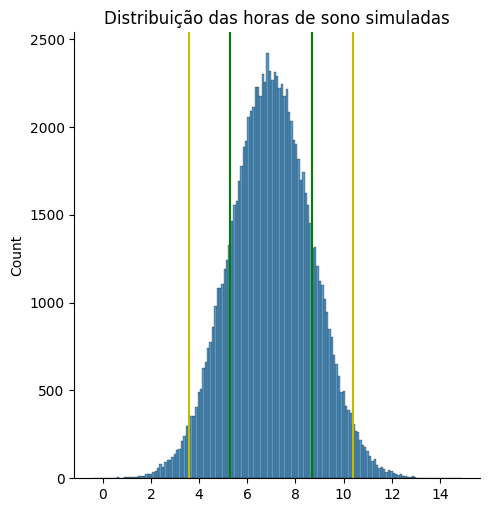

In [ ]:
sns.displot(Observations) #histograma com curva de densidade 

plt.axvline( np.mean(Observations) + np.std(Observations), color="g" ) #linha vertical na média + 1 desvio padrão
plt.axvline( np.mean(Observations) - np.std(Observations), color="g" ) #linha vertical na média - 1 desvio padrão

plt.axvline( np.mean(Observations) + 2*np.std(Observations), color="y" ) #linha vertical na média + 2 desvios padrão
plt.axvline( np.mean(Observations) - 2*np.std(Observations), color="y" ) #linha vertical na média - 2 desvios padrão
plt.title("Distribuição das horas de sono simuladas") # título do gráfico
plt.show()

In [5]:
std -> standard deviation

SyntaxError: invalid syntax (1625222670.py, line 1)

## Estatísticas descritivas da amostra simulada

In [ ]:
#estatistica dos dados de dataframe series
pd.Series(Observations).describe()

## Subamostras aleatórias

In [ ]:
SampleA = np.random.choice(Observations, 400) #amostra aleatória de 400 observações
SampleB = np.random.choice(Observations, 400) #amostra aleatória de 400 observações
SampleC = np.random.choice(Observations, 400) #amostra aleatória de 400 observações

## Histogramas das subamostras

In [ ]:
fig, ax = plt.subplots() #  figura e eixo
sns.histplot(SampleA, ax=ax, color="orange", alpha=0.1) # histograma da amostra A
sns.histplot(SampleB, ax=ax, color="purple", alpha=0.1) # histograma da amostra B
sns.histplot(SampleC, ax=ax, color="green", alpha=0.1) # histograma da amostra C
plt.title("Histogramas de subamostras de tamanho 400") # título do gráfico
plt.show()

In [ ]:
SampleA = np.random.choice(Observations, 800) #amostra aleatória de 800 observações
SampleB = np.random.choice(Observations, 800) #amostra aleatória de 800 observações
SampleC = np.random.choice(Observations, 800) #amostra aleatória de 800 observações

fig, ax = plt.subplots() # figura e eixo
sns.histplot(SampleA, ax=ax, color="orange", alpha=0.1) # histograma da amostra A
sns.histplot(SampleB, ax=ax, color="purple", alpha=0.1) # histograma da amostra B
sns.histplot(SampleC, ax=ax, color="green", alpha=0.1) # histograma da amostra C
plt.title("Histogramas de subamostras de tamanho 800")  # título do gráfico
plt.show()

In [ ]:
IC = ESTIMATIVA(Parâmetro) +/ MARGEM DE ERRO

## Proporção de dados em cada amostra dentro de 1 desvio padrão da média

In [ ]:
print((np.abs(SampleA - mu) < 1 * sigma).mean()) #proporção de observações dentro de 1 desvio padrão da média
print((np.abs(SampleB - mu) < 1 * sigma).mean()) #proporção de observações dentro de 1 desvio padrão da média
print((np.abs(SampleC - mu) < 1 * sigma).mean()) #proporção de observações dentro de 1 desvio padrão da média

## Comparação com distribuições não normais

In [ ]:
# Distribuição Exponencial
expdata = np.random.exponential(size=1000)

print("Exponencial")
print((np.abs(expdata - 1) < 1).mean()) # proporção de observações dentro de 1 unidade da média
print((np.abs(expdata - 1) < 2).mean()) # proporção de observações dentro de 2 unidades da média

print("Normal t-Student")
# Distribuição t de Student com 3 graus de liberdade
tdata = np.random.standard_t(3, size=1000) # média 0, desvio padrão sqrt(3/(3-2)) = sqrt(3)
print((np.abs(tdata) < 1 * np.sqrt(3)).mean()) # proporção de observações dentro de 1 desvio padrão da média
print((np.abs(tdata) < 2 * np.sqrt(3)).mean()) # proporção de observações dentro de 2 desvios padrão da média

## Função de distribuição empírica (ECDF)

In [ ]:
95% -> 5%

In [ ]:
5% -> 0.05

In [ ]:
0.05 / 2 -> 0.025

In [ ]:
0.05 / 2

In [ ]:
#Dos 100% eu subtraio os restos dos intervalos de confiança
1 - 0.025

In [ ]:
### FIM